# Pump It Up: Data Mining the Water Table 

Competition hosted by DrivenData 

Goal: Predict the status (functional, non-functional, functional needs repair) of waterpoints in Tanzania

## First things first: importing the dataset and relevant libraries 

In [1]:
import math
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from random import randint
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [265]:
# Load the datasets

training_values = pd.read_csv('training_values.csv')
training_labels = pd.read_csv('training_labels.csv')
test_values = pd.read_csv('test_values.csv')

## Some EDA and Data Visualization

Let's check out the features and labels

### Features

In [140]:
print('The features of this dataset include:\n')
for column in training_values.columns:
    print(column)
print(training_values.shape)

The features of this dataset include:

id
amount_tsh
date_recorded
funder
gps_height
installer
longitude
latitude
wpt_name
num_private
basin
subvillage
region
region_code
district_code
lga
ward
population
public_meeting
recorded_by
scheme_management
scheme_name
permit
construction_year
extraction_type
extraction_type_group
extraction_type_class
management
management_group
payment
payment_type
water_quality
quality_group
quantity
quantity_group
source
source_type
source_class
waterpoint_type
waterpoint_type_group
(59400, 40)


In [141]:
# Printing out some examples of what is recorded for each feature in the dataset

print('A sample of the values in those columns: \n')
training_values.loc[0:6,'id':'basin']
training_values.loc[0:6, 'subvillage':'scheme_management']
training_values.loc[0:6, 'scheme_name':'management_group']
training_values.loc[0:6, 'payment':'waterpoint_type_group']

A sample of the values in those columns: 



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal


,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management
0,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC
1,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other
2,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC
3,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC
4,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN
5,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC
6,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC


,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group
0,Roman,False,1999,gravity,gravity,gravity,vwc,user-group
1,NaN,True,2010,gravity,gravity,gravity,wug,user-group
2,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group
3,NaN,True,1986,submersible,submersible,submersible,vwc,user-group
4,NaN,True,0,gravity,gravity,gravity,other,other
5,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group
6,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group


,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [142]:
print('A quick description of the numerical features: \n')
print(training_values.describe())

A quick description of the numerical features: 

                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.58740

In [143]:
print('The number of null values for each feature: \n')
print(training_values.isnull().sum())

The number of null values for each feature: 

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type            

### Labels

This quick countplot of waterpoint status labels shows us that our labels are pretty unbalanced. 

What do the waterpoint status labels look like? 

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64


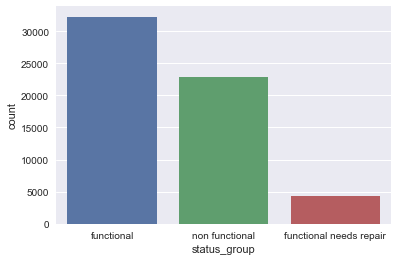

In [71]:
print('What do the waterpoint status labels look like? \n')
print(training_labels['status_group'].value_counts())
sns.countplot(x = 'status_group', data = training_labels)
plt.show()

### A map of all of the waterpoints in Tanzania made in Tableau. Color reflects the status of the waterpump and size reflects the population recorded using that waterpump. 

While it's nice to see the entire county, there are so many waterpoints that it might be nice to inspect a smaller area.

<img src="Waterpoint_Tanzania.png">

### Let's look at only the region of Mtwara

Here in the region of Mtwara we can see a mix of functional, functional but need repair, and non functional waterpoints.

<img src="Waterpoint_Mtwara.png">

### Filter waterpoints to only show waterpoint types listed as "Other"

Now, we can see that the majority of waterpoints listed as "Other" are non functional even in places with large populations.

<img src="Waterpoint_Type_Other.png">

### Let's look at the ordinal features

In [73]:
everything = pd.merge(training_values, training_labels, how = 'inner', on = 'id')
everything['construction_year'] = everything['construction_year'].replace(0, np.NaN)
everything['longitude'] = everything['longitude'].replace(0, np.NaN)

everything['date_recorded'] = everything['date_recorded'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


 Pairplot of the ordinal features:


/Users/Jackie/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/Jackie/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


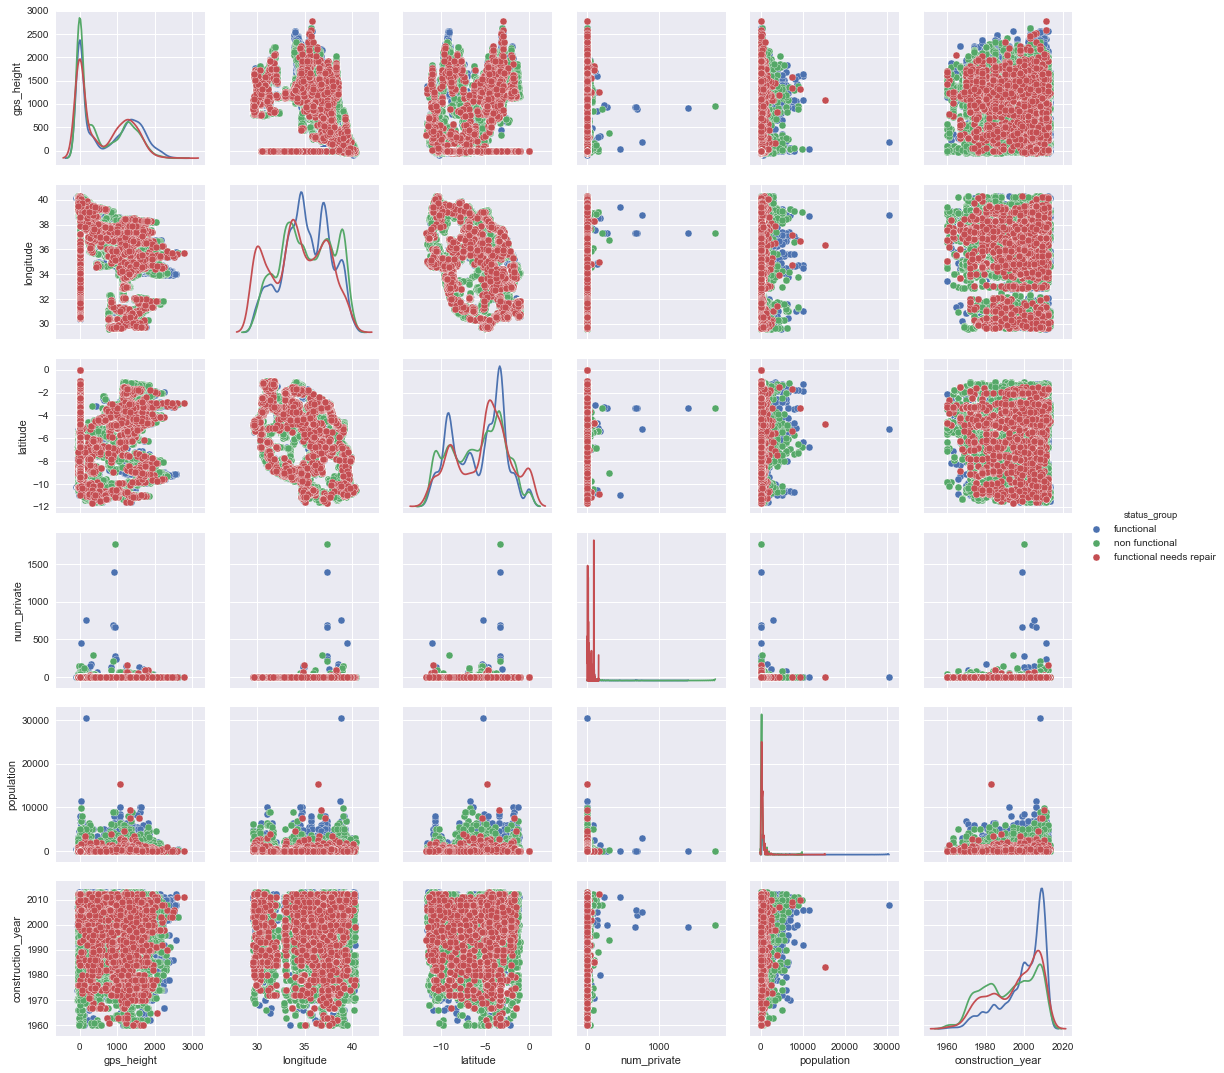

In [74]:
print('\n Pairplot of the ordinal features:')
sns.pairplot(everything, vars = ['gps_height', 'longitude', 'latitude', 'num_private', 'population', 
                                 'construction_year'], hue = 'status_group', diag_kind = 'kde')
plt.show()

## Feature Selection and Feature Engineering

In [266]:
# Formatting the columns into categories and datetime

columns = ['district_code', 'extraction_type', 'quantity', 'source', 'public_meeting',
           'waterpoint_type', 'funder', 'installer', 'extraction_type_class', 'permit', 'management', 
           'payment_type', 'water_quality', 'basin', 'subvillage', 'region', 'lga', 'ward', 'recorded_by',
           'scheme_management', 'scheme_name', 'extraction_type_group', 'management_group', 'payment',
           'quality_group', 'source_type', 'source_class', 'waterpoint_type_group', 'wpt_name', 'quantity_group']

training_values[columns] = training_values[columns].apply(lambda x: x.astype('category'))
test_values[columns] = test_values[columns].apply(lambda x: x.astype('category'))

training_values['date_recorded'] = training_values['date_recorded'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
test_values['date_recorded'] = test_values['date_recorded'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

### longitude, latitude, and gps_height

There are 1812 times that zero was entered for longitude. Every time longitude was recorded as zero, latitude was recorded as -2.000000e-08, and gps_height was recorded as zero. 

To replace the zero values with something semi-accurate, I computed the mean longitude, mean latitude, and mean gps_height for each region and saved them to a dictionary. Then, when an instance of zero longitude was found, I replaced the longitude, latitude, and gps_height with the mean of the region where that waterpoint existed.

In [267]:
# small region_code dataframe

region_df = training_values[['region_code', 'longitude', 'latitude', 'gps_height']].copy()
region_df = region_df.sort_values(['region_code'])
region_df[:5]

,region_code,longitude,latitude,gps_height
31023,1,36.040140,-4.729822,0
10601,1,36.479069,-6.174439,0
54054,1,36.489771,-7.104349,0
39734,1,35.830580,-4.381180,0
39723,1,35.993264,-7.026813,0


In [268]:
# calculates mean longitude, mean latitude, and mean gps_height for each region_code

def region_mean(df):
    old_region = None
    lats = []
    longs = []
    hts = []
    region_dict = {}
    
    for index, row in df.iterrows():
        this_region = int(row['region_code'])
        this_lat = float(row['latitude'])
        this_long = float(row['longitude'])
        this_ht = float(row['gps_height'])
        
        # if this is the first in a region
        if old_region and old_region != this_region:
            
            # printing out the previous region's mean_lat and mean_long
            mean_lat = float(np.mean(lats))
            mean_long = float(np.mean(longs))
            mean_ht = float(np.mean(hts))
            print('%s mean lat: %f, mean long: %f' % (old_region, mean_lat, mean_long))
            region_dict[old_region] = {}
            region_dict[old_region]['mean_lat'] = mean_lat
            region_dict[old_region]['mean_long'] = mean_long
            region_dict[old_region]['mean_ht'] = mean_ht
            
            # reset mean_lat and mean_long
            lats = []
            longs = []
            hts = []
        
        # update region
        old_region = this_region
        
        # this region is the same as last region, append lats and longs
        lats.append(this_lat)
        longs.append(this_long)
        hts.append(this_ht)
        
    # print out very last region
    if old_region != None:
        mean_lat = float(np.mean(lats))
        mean_long = float(np.mean(longs))
        mean_ht = float(np.mean(hts))
        print('%s mean lat: %f, mean long: %f' % (old_region, mean_lat, mean_long))
        region_dict[old_region] = {}
        region_dict[old_region]['mean_lat'] = mean_lat
        region_dict[old_region]['mean_long'] = mean_long
        region_dict[old_region]['mean_ht'] = mean_ht
        
    return region_dict

# make the dictionary

region_dict = region_mean(region_df)

1 mean lat: -5.928734, mean long: 36.044171
2 mean lat: -3.231963, mean long: 36.648738
3 mean lat: -3.522823, mean long: 37.505108
4 mean lat: -5.057761, mean long: 38.524448
5 mean lat: -7.400013, mean long: 37.047041
6 mean lat: -6.678934, mean long: 38.754707
7 mean lat: -6.909677, mean long: 39.215799
8 mean lat: -10.310537, mean long: 38.572954
9 mean lat: -10.628146, mean long: 39.771740
10 mean lat: -10.774379, mean long: 35.729304
11 mean lat: -8.899634, mean long: 34.875276
12 mean lat: -9.097418, mean long: 33.531505
13 mean lat: -4.904662, mean long: 34.741842
14 mean lat: -4.718531, mean long: 32.875762
15 mean lat: -7.359283, mean long: 31.284387
16 mean lat: -4.296219, mean long: 30.214677
17 mean lat: -2.754996, mean long: 26.232339
18 mean lat: -1.980648, mean long: 31.253878
19 mean lat: -1.973762, mean long: 24.924562
20 mean lat: -1.739903, mean long: 34.153940
21 mean lat: -4.286211, mean long: 35.932915
24 mean lat: -3.380886, mean long: 35.661985
40 mean lat: -7.

In [269]:
# function to replace the long, lat, and gps_height in the instances longitude equals zero

def replace_zeros(df, dictionary):
    
    for index, row in df.iterrows():
        region = int(row['region_code'])
        
        if row['longitude'] == 0.0:
            df.loc[index, 'longitude'] = region_dict.get(region).get('mean_long')
            df.loc[index, 'latitude'] = region_dict.get(region).get('mean_lat')
            df.loc[index, 'gps_height'] = region_dict.get(region).get('mean_ht')
            
    return df

# calling the replace_zeros function for the training and test sets

training_values = replace_zeros(training_values, region_dict)
test_values = replace_zeros(test_values, region_dict)

### date_recorded

The rainy season is in March, April, and May. Maybe if the waterpoint information was collected during one of those months is affects the label of the waterpoint. I added a month column using the date_recorded feature to determine if recording data during the rainy season made an impact on waterpoint status classification

https://www.expertafrica.com/tanzania/info/tanzania-weather-and-climate

In [270]:
# populating the column 'rainy' with whether or not it was a rainy month when 
# the waterpoint status was recorded

def rainy_month(date):
    if date.month > 2 and date.month < 6:
        rainy = 1
    else: 
        rainy = 0
    return rainy
        
training_values['rainy'] = training_values.apply(
    lambda row: rainy_month(row['date_recorded']), axis = 1)
test_values['rainy'] = test_values.apply(
    lambda row: rainy_month(row['date_recorded']), axis = 1)

training_values.month = training_values['rainy'].astype('category')
test_values.month = test_values['rainy'].astype('category')

,rainy,status_group,month
0,1,functional,3
1,1,functional,3
2,0,functional,2
3,0,non functional,1
4,0,functional,7


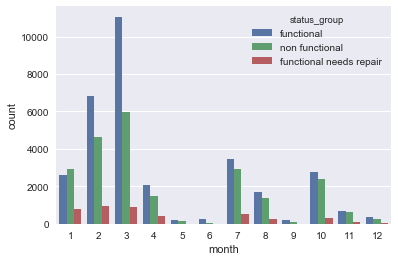

In [271]:
# Plotting the statuses recorded each month

df_rainy = pd.merge(training_values, training_labels, how = 'inner', on = 'id')
df_rainy = df_rainy[['rainy', 'status_group']]
df_rainy['month'] = training_values['date_recorded'].dt.month
df_rainy.head()
sns.countplot(x = "month", hue = "status_group", data = df_rainy)
plt.show()

### Waterpoint Age (recorded year - construction year)

Subtracted the construction year from the recorded year

In [272]:
# Changed the zero values for construction year to NaN to get an accurate mean
# Filled in the NaN's with the construction year mean of 1997

training_values.construction_year = training_values['construction_year'].replace(0, np.NaN)
test_values.construction_year = test_values['construction_year'].replace(0, np.NaN)

con_year_mean = math.ceil(training_values['construction_year'].mean())
print('The construction_year mean is:', con_year_mean)

training_values.construction_year = training_values['construction_year'].fillna(con_year_mean)
test_values.construction_year = test_values['construction_year'].fillna(con_year_mean)

The construction_year mean is: 1997


In [273]:
training_values['age'] = 0
test_values['age'] = 0

def years_service(df):
    
    for index, row in df.iterrows():
        rec_date = df.loc[index, 'date_recorded']
        rec_year = rec_date.year
        con_year = df.loc[index, 'construction_year']
        df.loc[index, 'age'] = rec_year - con_year

years_service(training_values)
years_service(test_values)

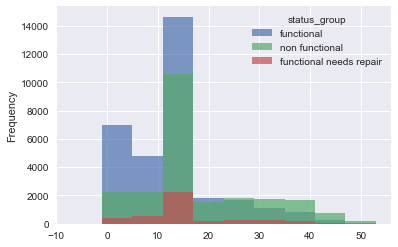

In [274]:
# Plotting the statuses for the age of the waterpoints

df_age = pd.merge(training_values, training_labels, how = 'inner', on = 'id')
df_age = df_age[['age', 'status_group']]
df_age = df_age.pivot(columns = 'status_group', values = 'age')
cols = ['functional', 'non functional', 'functional needs repair']
df_age = df_age[cols]

df_age.plot.hist(alpha = 0.7, bins = 10)
plt.show()

## LDA

Used Sebastian Raschka's Linear Discriminant Analysis article to investigate dimensionality reduction.
http://sebastianraschka.com/Articles/2014_python_lda.html

This is all written out long-hand instead of using scikit-learn's LinearDiscrimantAnalysis because this is new to me and I wanted to see it coded out.

In [275]:
df = training_values.copy()
df_test = test_values.copy()

# F for features
F = df[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
                    'population', 'construction_year', 'age']].values
F_test = df_test[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 
                    'population', 'construction_year', 'age']].values

# t for target
t = training_labels['status_group'].values

enc = LabelEncoder()
label_encoder = enc.fit(t)
t = label_encoder.transform(t) + 1

label_dict = {1: 'Functional', 2: 'Non Functional', 3:'Functional Needs Repair'}

feature_dict = {i:label for i,label in zip(range(7), 
                ('amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
                'population', 'construction_year', 'age'))}

In [276]:
# Mean vectors of the three different status group classes

np.set_printoptions(precision=4)

mean_vectors = []
for cl in range(1,4):
    mean_vectors.append(np.mean(F[t == cl], axis=0))
    print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl-1]))

Mean Vector class 1: [  4.6180e+02   7.4247e+02   3.4936e+01  -5.7715e+00   5.3901e-01
   1.8755e+02   1.9990e+03   1.2917e+01]

Mean Vector class 2: [  2.6707e+02   6.3251e+02   3.3575e+01  -5.4015e+00   3.0762e-01
   1.7510e+02   1.9960e+03   1.6095e+01]

Mean Vector class 3: [  1.2348e+02   5.7726e+02   3.4999e+01  -5.8649e+00   4.1395e-01
   1.7002e+02   1.9941e+03   1.7847e+01]



In [277]:
# Scatter Matrices

S_W = np.zeros((8,8))
for cl,mv in zip(range(1,4), mean_vectors):
    class_sc_mat = np.zeros((8,8))                  # scatter matrix for every class
    for row in F[t == cl]:
        row, mv = row.reshape(8,1), mv.reshape(8,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat                             # sum class scatter matrices
print('Within-Class Scatter Matrix:\n', S_W)

overall_mean = np.mean(F, axis=0)

S_B = np.zeros((8,8))
for i,mean_vec in enumerate(mean_vectors):  
    n = F[t == i+1,:].shape[0]
    mean_vec = mean_vec.reshape(8,1) # make column vector
    overall_mean = overall_mean.reshape(8,1) # make column vector
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print('Between-Class Scatter Matrix:\n', S_B)

Within-Class Scatter Matrix:
 [[  5.3219e+11   8.6524e+09   1.1068e+07  -2.6557e+07   5.8087e+06
    1.2869e+09  -1.2587e+07   1.1980e+07]
 [  8.6524e+09   2.7976e+10   7.6275e+06  -9.7972e+05   3.2636e+06
    2.5521e+09  -1.5204e+07   2.7859e+07]
 [  1.1068e+07   7.6275e+06   5.4150e+05  -1.8136e+05   9.0979e+04
    7.5324e+06   2.5329e+04  -1.0169e+04]
 [ -2.6557e+07  -9.7972e+05  -1.8136e+05   4.7513e+05   1.6874e+04
   -1.0453e+06   5.0097e+04  -2.4791e+04]
 [  5.8087e+06   3.2636e+06   9.0979e+04   1.6874e+04   8.8932e+06
    1.2754e+06  -3.4205e+04   2.4757e+04]
 [  1.2869e+09   2.5521e+09   7.5324e+06  -1.0453e+06   1.2754e+06
    1.3200e+10   6.8623e+06  -3.3127e+06]
 [ -1.2587e+07  -1.5204e+07   2.5329e+04   5.0097e+04  -3.4205e+04
    6.8623e+06   5.6950e+06  -5.6850e+06]
 [  1.1980e+07   2.7859e+07  -1.0169e+04  -2.4791e+04   2.4757e+04
   -3.3127e+06  -5.6850e+06   5.7295e+06]]
Between-Class Scatter Matrix:
 [[  1.5418e+09   7.5617e+08   2.0358e+04   3.3347e+05   6.0476e+05

In [278]:
# Solving the eigenvalue problem

eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(8,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))

    
# Checking the eigenvector-eigenvalue calculation

for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(8,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal = 6, err_msg = '', verbose = True)
print('\nok')


Eigenvector 1: 
[[ -1.4502e-04]
 [ -2.0390e-03]
 [ -3.4568e-02]
 [ -7.5348e-02]
 [ -2.9037e-03]
 [ -3.3476e-05]
 [  5.7578e-01]
 [  8.1338e-01]]
Eigenvalue 1: 8.01e-02

Eigenvector 2: 
[[  2.3191e-05]
 [ -1.2343e-04]
 [ -4.5120e-01]
 [ -5.9751e-02]
 [  2.9252e-03]
 [  9.9886e-05]
 [  6.3704e-01]
 [  6.2212e-01]]
Eigenvalue 2: 1.74e-02

Eigenvector 3: 
[[-0.001 ]
 [-0.0069]
 [ 0.183 ]
 [ 0.3087]
 [ 0.0029]
 [ 0.0011]
 [ 0.7913]
 [ 0.495 ]]
Eigenvalue 3: -1.14e-16

Eigenvector 4: 
[[ -3.5406e-05]
 [ -1.5123e-03]
 [  4.3649e-02]
 [ -1.3581e-01]
 [ -4.6737e-03]
 [ -2.0804e-04]
 [  7.3046e-01]
 [  6.6788e-01]]
Eigenvalue 4: 6.83e-16

Eigenvector 5: 
[[ 0.0019]
 [-0.0014]
 [-0.2715]
 [-0.9332]
 [-0.0075]
 [-0.0016]
 [-0.1953]
 [-0.1314]]
Eigenvalue 5: -1.70e-17

Eigenvector 6: 
[[  2.4509e-04]
 [  1.9474e-04]
 [ -2.8663e-01]
 [ -9.5407e-01]
 [ -5.0452e-02]
 [ -3.2003e-03]
 [ -4.8431e-02]
 [ -5.1844e-02]]
Eigenvalue 6: -3.29e-18

Eigenvector 7: 
[[ 0.001 ]
 [-0.0018]
 [ 0.3311]
 [ 0.8363]
 [

In [279]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key = lambda k: k[0], reverse = True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])
    
print('\n\nVariance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))


Eigenvalues in decreasing order:

0.0800811261833
0.017447283102
6.83104068659e-16
1.13939572827e-16
1.69757113125e-17
3.28565744652e-18
7.28604879399e-19
1.57624778479e-19


Variance explained:

eigenvalue 1: 82.11%
eigenvalue 2: 17.89%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%
eigenvalue 5: 0.00%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%


In [280]:
W = np.hstack((eig_pairs[0][1].reshape(8,1), eig_pairs[1][1].reshape(8,1)))
print('Matrix W:\n', W.real)


Matrix W:
 [[ -1.4502e-04   2.3191e-05]
 [ -2.0390e-03  -1.2343e-04]
 [ -3.4568e-02  -4.5120e-01]
 [ -7.5348e-02  -5.9751e-02]
 [ -2.9037e-03   2.9252e-03]
 [ -3.3476e-05   9.9886e-05]
 [  5.7578e-01   6.3704e-01]
 [  8.1338e-01   6.2212e-01]]


In [281]:
F_lda = F.dot(W)
F_test_lda = F_test.dot(W)

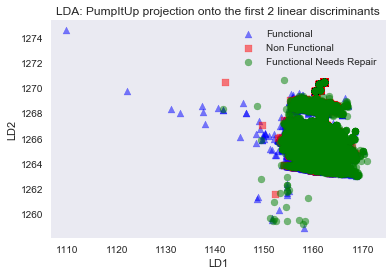

In [282]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x = F_lda[:,0].real[t == label],
                y = F_lda[:,1].real[t == label],
                marker = marker,
                color = color,
                alpha = 0.5,
                label = label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc = 'upper right', fancybox = True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: PumpItUp projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off',  
            labelbottom = 'on', left = 'off', right = 'off', labelleft = 'on')

    # remove axis spines
    ax.spines['top'].set_visible(False)  
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [283]:
print(F_lda.shape)
print(training_values.shape)

print(F_test_lda.shape)
print(test_values.shape)

(59400, 2)
(59400, 42)
(14850, 2)
(14850, 42)


In [284]:
training_values['LD1'] = F_lda[:, 0]
training_values['LD2'] = F_lda[:, 1]
print(training_values.shape)

test_values['LD1'] = F_test_lda[:, 0]
test_values['LD2'] = F_test_lda[:, 1]
print(test_values.shape)

(59400, 44)
(14850, 44)


### gps_height

I chose to group the values of this feature by replacing the actual gps_height with a height range.

I'm not sure if I can do this after already using gps_height in the LDA...

In [285]:
training_values.gps_height.value_counts()

 0.000000       18626
 44.214927       1057
 144.492616       752
-15.000000         60
-13.000000         55
-16.000000         55
 1290.000000       52
-20.000000         52
 303.000000        51
-14.000000         51
-18.000000         49
-19.000000         47
 1269.000000       46
 1295.000000       46
 1304.000000       45
-23.000000         45
-8.000000          44
 1538.000000       44
 280.000000        44
 1286.000000       44
-17.000000         44
 1332.000000       43
 320.000000        43
 1317.000000       42
 1264.000000       42
-27.000000         42
 1288.000000       42
 1303.000000       42
 1293.000000       42
 1319.000000       42
                ...  
 2057.000000        1
 2345.000000        1
 2015.000000        1
 2628.000000        1
 2391.000000        1
 2319.000000        1
 2264.000000        1
 2450.000000        1
 2254.000000        1
 2623.000000        1
 2278.000000        1
 2287.000000        1
 2322.000000        1
 2292.000000        1
 2302.0000

In [286]:
training_values.gps_height = training_values.gps_height.apply(
                                lambda x: '>500' if x > 500
                                else '0 - 500' if x > 0
                                else '0 or below')


test_values.gps_height = test_values.gps_height.apply(
                                lambda x: '>500' if x > 500
                                else '0 - 500' if x > 0
                                else '0 or below')


training_values.gps_height = training_values.gps_height.astype('category')
test_values.gps_height = test_values.gps_height.astype('category')

### Classifying those categories with low numbers as "other"

Did this for installer, funder, and ward

In [287]:
threshold = 15
for col in training_values[['installer', 'funder', 'ward']]:
    value_counts = training_values[col].value_counts()
    to_replace = value_counts[value_counts <= threshold].index
    training_values[col].replace(to_replace, 'other', inplace = True)
    test_values[col].replace(to_replace, 'other', inplace = True)

## Encoding Categorical features and splitting the data into training and test sets

In [288]:
X = training_values.drop(['id', 'wpt_name', 'date_recorded', 'amount_tsh', 'longitude', 'latitude', 'num_private', 
                          'population', 'construction_year', 'extraction_type_class', 'extraction_type_group', 
                          'recorded_by', 'age', 'quantity_group', 'region_code', 'quality_group', 
                          'scheme_name', 'payment', 'permit', 'source', 'subvillage'], axis = 1)

y = training_labels['status_group']

X_test_data = test_values.drop(['id', 'wpt_name', 'date_recorded', 'amount_tsh', 'longitude', 'latitude', 'num_private', 
                                'population', 'construction_year', 'extraction_type_class', 'extraction_type_group', 
                               'recorded_by', 'age', 'quantity_group', 'region_code', 'quality_group',
                                'scheme_name', 'payment', 'permit', 'source', 'subvillage'], axis = 1)

In [289]:
X.columns

Index(['funder', 'gps_height', 'installer', 'basin', 'region', 'district_code',
       'lga', 'ward', 'public_meeting', 'scheme_management', 'extraction_type',
       'management', 'management_group', 'payment_type', 'water_quality',
       'quantity', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'rainy', 'LD1', 'LD2'],
      dtype='object')

In [290]:
columns = ['installer', 'funder', 'basin', 'region', 'management', 'rainy', 'gps_height',
           'extraction_type', 'ward', 'public_meeting', 'lga', 'scheme_management',
           'management_group', 'quantity', 'source_type', 'water_quality', 'source_class',
           'waterpoint_type', 'waterpoint_type_group', 'district_code', 'payment_type']

X = pd.get_dummies(X[columns], dummy_na = True)
X_test_data = pd.get_dummies(X_test_data[columns], dummy_na = True)

X_test_data = X_test_data.reindex(columns = X.columns, fill_value=0)

In [291]:
print(X.shape)
print(X_test_data.shape)

(59400, 2199)
(14850, 2199)


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

## Random Forest Classifier

In [293]:
rf_classifier = RandomForestClassifier(n_estimators = 260, criterion = 'gini',
                                       min_samples_split = 6,
                                       random_state = 6)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            n_estimators=260, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

In [ ]:
rf_y_pred = rf_classifier.predict(X_test)
rf_score = rf_classifier.score(X_test, y_test)
print('Random Forest Classifier Mean Accuracy:', rf_score)

Random Forest Classifier Mean Accuracy: 0.801683501684
[[8629  824  163]
 [1503 5273   97]
 [ 700  247  384]]


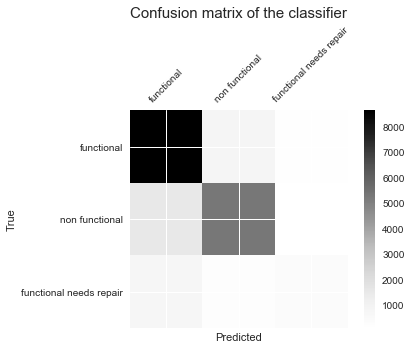

In [305]:
labels = ['functional', 'non functional', 'functional needs repair']
cm = confusion_matrix(y_test, rf_y_pred, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier', fontsize = 15, y = 1.4)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation = 45)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Predicting on the test set

In [56]:
predictions = rf_classifier.predict(X_test_data)

In [57]:
test_ids = np.array(test_values['id'].astype(int))
solution = pd.DataFrame(predictions, test_ids, columns = ['status_group'])

In [58]:
print(solution.head())
print(solution.shape)

         status_group
50785  non functional
51630      functional
17168      functional
45559  non functional
49871      functional
(14850, 1)


In [59]:
solution.to_csv('solution8.csv', index_label = ['id'])